# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [412]:
import pandas as pd
import seaborn as sns
import numpy as np
import random
import matplotlib.pyplot as plt

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [413]:
temp = pd.read_csv("Temp_States.csv")

#### Print `temp`

In [414]:
temp

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [415]:
temp.dtypes

City            object
State           object
Temperature    float64
dtype: object

In [416]:
#We have floats for temperatures, and 'objects' for the State and City

#### Select the rows where state is New York

In [417]:
condition_ny = temp["State"] == "New York"
temp_ny = temp[condition_ny]
temp_ny

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [418]:
temp_ny_avg = temp_ny.groupby(["State"]).agg(
    mean_temperature=("Temperature", "mean")
)

temp_ny_avg

,mean_temperature
State,
New York,10.740741


#### We want to know cities and states with Temperature above 15 degress Celcius

In [419]:
condition_15 = temp["Temperature"] > 15
temp_15 = temp[condition_15]
temp_15

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [420]:
temp_15.drop(["State"], axis = 1)

,City,Temperature
0,NYC,19.444444
3,Hartford,17.222222
5,Treton,22.222222
6,Newark,20.000000


#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [421]:
condition_15 = temp["Temperature"] > 15
condition_20 = temp["Temperature"] < 20
temp_15_20 = temp[condition_15 & condition_20]
temp_15_20

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222


#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [422]:
temp_mean_sdev = temp.groupby(["State"]).agg(
    mean_temperature_state=("Temperature", "mean"),
    stdev_state=("Temperature", "std")
)

temp_mean_sdev

,mean_temperature_state,stdev_state
State,,
Connecticut,15.833333,1.964186
New Jersey,21.111111,1.571348
New York,10.740741,8.133404


# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [423]:
employee = pd.read_csv("employee.csv")
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### Explore the data types of the Temp dataframe. Comment your results

In [424]:
employee.dtypes

Name          object
Department    object
Education     object
Gender        object
Title         object
Years          int64
Salary         int64
dtype: object

In [425]:
#a couple of integers, mostly objects. Possibility of correlating seniority with salary.

#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

In [426]:
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")

<function matplotlib.pyplot.show(close=None, block=None)>

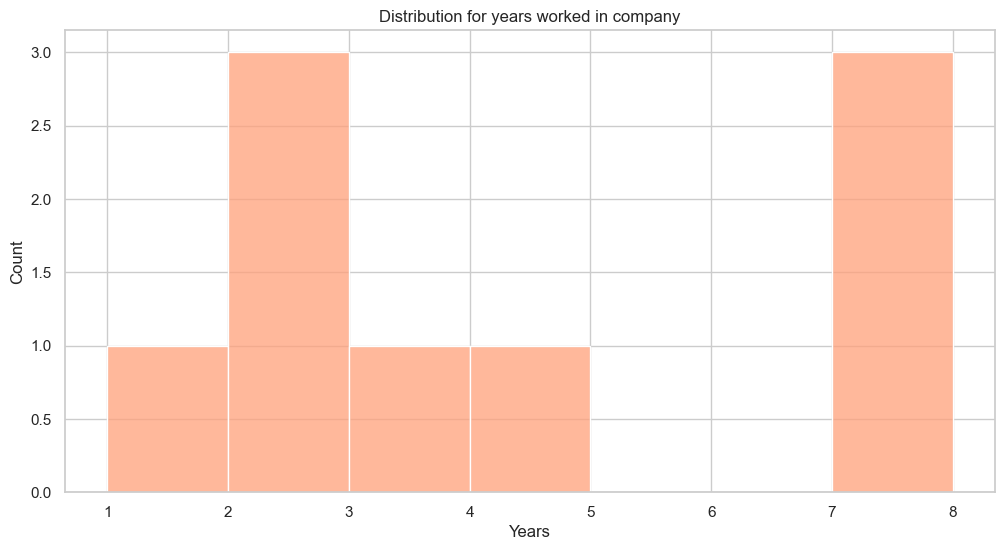

In [427]:
sns.histplot(x=employee["Years"], binwidth = 1, color = "#FFA07A")
plt.title("Distribution for years worked in company")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

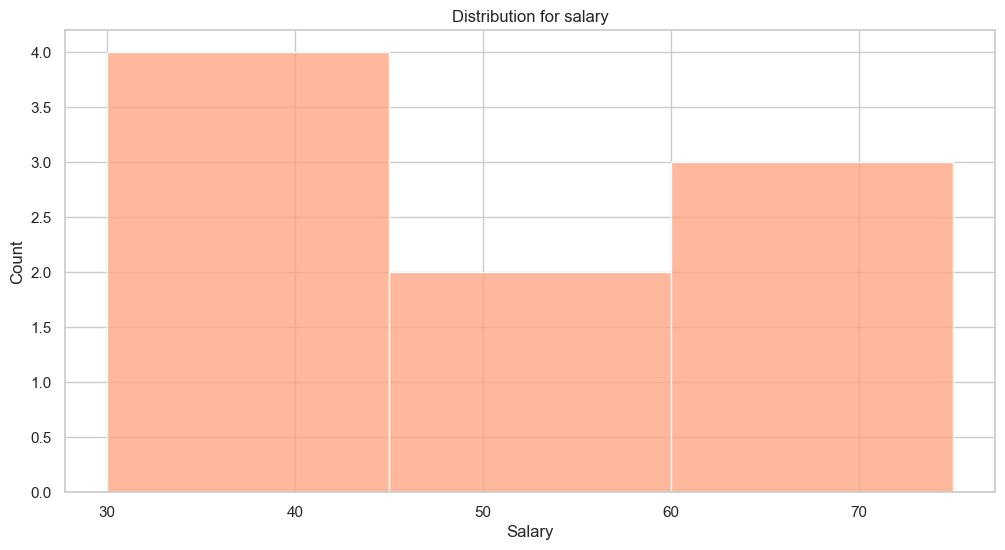

In [428]:
sns.histplot(x=employee["Salary"], binwidth = 15, color = "#FFA07A")
plt.title("Distribution for salary")
plt.show

In [429]:
#The historgrams are pretty inconclusive due to the small sample size. In a dataframe 10x this size we could comment on the distribution

#### What's the average salary in this company?

In [430]:
employee['Salary'].mean()

48.888888888888886

#### What's the highest salary?

In [431]:
employee['Salary'].max()

70

#### What's the lowest salary?

In [432]:
employee['Salary'].min()

30

#### Who are the employees with the lowest salary?

In [433]:
condition_low = employee['Salary'] == 30
lowest_paid = employee[condition_low]
lowest_paid

,Name,Department,Education,Gender,Title,Years,Salary
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Could you give all the information about an employee called David?

In [434]:
condition_david = employee['Name'] == 'David'
david = employee[condition_david]
david

,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [435]:
print(david["Salary"])

2    30
Name: Salary, dtype: int64


#### Print all the rows where job title is associate

In [436]:
condition_associate = employee['Title'] == 'associate'
associates = employee[condition_associate]
associates

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [437]:
employee.head(3)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [438]:
employee[:3]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [439]:
condition_associate = employee['Title'] == 'associate'
condition_salary = employee['Salary'] > 55
associates_55 = employee[condition_salary & condition_associate]
associates_55

,Name,Department,Education,Gender,Title,Years,Salary
7,Pedro,IT,Phd,M,associate,7,60


In [440]:
pd.set_option('display.max_rows', None)

#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [441]:
years_avg_salary = employee.groupby("Years").agg(
    Employee_Names=pd.NamedAgg(column="Name", aggfunc=lambda x: ", ".join(x)),
    Average_Salary=pd.NamedAgg(column="Salary", aggfunc="mean")
).reset_index()

years_avg_salary

,Years,Employee_Names,Average_Salary
0,1,Jose,35.000000
1,2,"Maria, David, Eva",38.333333
2,3,Samuel,55.000000
3,4,Sonia,35.000000
4,7,Pedro,60.000000
5,8,"Carlos, Ana",70.000000


####  What is the average Salary per title?

In [442]:
employee.groupby("Title").agg(average_salary = ("Salary", "mean"))

,average_salary
Title,
VP,70.000000
analyst,32.500000
associate,56.666667


#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

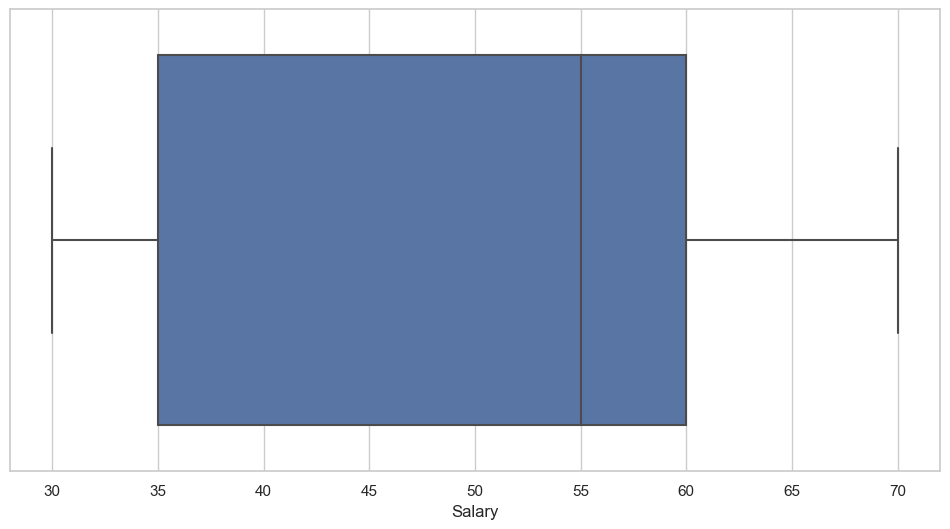

In [443]:
sns.boxplot(x=employee.Salary);

In [444]:
q1 = employee["Salary"].quantile(0.25)
q1

35.0

In [445]:
q3 = employee["Salary"].quantile(0.75)
q3

60.0

#### Is the mean salary per gender different?

In [446]:
condition_M = employee["Gender"] == "M"
condition_F = employee["Gender"] == "F"

employee_F = employee[condition_F]
employee_M = employee[condition_M]

print(employee_F["Salary"].mean())
print(employee_M["Salary"].mean())

47.5
50.0


#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [447]:
employee_min_mean_max = employee.groupby("Department").agg(
    min_salary=("Salary", "min"),
    max_salary=("Salary", "max"),
    mean_salary=("Salary", "mean"),
    min_years=("Years", "min"),
    max_years=("Years", "max"),
    mean_years=("Years", "mean"))

employee_min_mean_max

,min_salary,max_salary,mean_salary,min_years,max_years,mean_years
Department,,,,,,
HR,30,70,45.00,2,8,4.666667
IT,30,70,48.75,1,8,4.500000
Sales,55,55,55.00,2,3,2.500000


### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [501]:
orders = pd.read_csv("Orders.csv")

#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [502]:
orders.dtypes

Unnamed: 0        int64
InvoiceNo         int64
StockCode        object
year              int64
month             int64
day               int64
hour              int64
Description      object
Quantity          int64
InvoiceDate      object
UnitPrice       float64
CustomerID        int64
Country          object
amount_spent    float64
dtype: object

In [503]:
orders.describe()

,Unnamed: 0,InvoiceNo,year,month,day,hour,Quantity,UnitPrice,CustomerID,amount_spent
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,278465.221859,560617.126645,2010.934259,7.612537,3.614555,12.728247,13.021823,3.116174,15294.315171,22.394749
std,152771.368303,13106.167695,0.247829,3.416527,1.928274,2.273535,180.420210,22.096788,1713.169877,309.055588
min,0.000000,536365.000000,2010.000000,1.000000,1.000000,6.000000,1.000000,0.000000,12346.000000,0.000000
25%,148333.750000,549234.000000,2011.000000,5.000000,2.000000,11.000000,2.000000,1.250000,13969.000000,4.680000
50%,284907.500000,561893.000000,2011.000000,8.000000,3.000000,13.000000,6.000000,1.950000,15159.000000,11.800000
75%,410079.250000,572090.000000,2011.000000,11.000000,5.000000,14.000000,12.000000,3.750000,16795.000000,19.800000
max,541908.000000,581587.000000,2011.000000,12.000000,7.000000,20.000000,80995.000000,8142.750000,18287.000000,168469.600000


In [504]:
#Mostly numerical values so lots of potential to see correlations

####  What is the average Purchase Price?

In [505]:
orders.UnitPrice.mean()

3.1161744805540756

#### What were the highest and lowest purchase prices? 

In [506]:
orders.UnitPrice.min()

0.0

In [507]:
orders.UnitPrice.max()

8142.75

#### Select all the customers we have in Spain

In [508]:
condition_spain = orders["Country"] == "Spain"
orders_spain = orders[condition_spain]
orders_spain.head(10)


,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4251,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
4252,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.00
4253,6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4254,6425,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
13974,21565,538095,22504,2010,12,4,14,cabin bag vintage retrospot,1,2010-12-09 14:55:00,29.95,17097,Spain,29.95
13975,21566,538095,22212,2010,12,4,14,four hook white lovebirds,1,2010-12-09 14:55:00,2.10,17097,Spain,2.10
13976,21567,538095,22953,2010,12,4,14,birthday party cordon barrier tape,1,2010-12-09 14:55:00,1.25,17097,Spain,1.25
13977,21568,538095,84818,2010,12,4,14,danish rose photo frame,1,2010-12-09 14:55:00,2.55,17097,Spain,2.55
13978,21569,538095,21114,2010,12,4,14,lavender scented fabric heart,5,2010-12-09 14:55:00,1.25,17097,Spain,6.25


#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [509]:
len(orders_spain["CustomerID"].unique())

30

In [510]:
len(orders_spain.CustomerID.value_counts())

30

#### Select all the customers who have bought more than 50 items ?

In [511]:
by_customer= orders.groupby("CustomerID").agg(
    total_items = ("Quantity", "sum"))

condition_50 = by_customer["total_items"] > 50

by_customer_over50 = by_customer[condition_50]
by_customer_over50

,total_items
CustomerID,
12346,74215
12347,2458
12348,2341
12349,631
12350,197
12352,536
12354,530
12355,240
12356,1591


#### Select orders from Spain that are above 50 items

In [512]:
spain_50 = orders_spain[orders_spain.Quantity > 50]
spain_50.head(10)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4251,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
4252,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.00
4253,6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4254,6425,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
32454,52416,540785,84997B,2011,1,2,11,red 3 piece retrospot cutlery set,144,2011-01-11 11:39:00,3.39,12557,Spain,488.16
32455,52417,540785,84997D,2011,1,2,11,pink 3 piece polkadot cutlery set,360,2011-01-11 11:39:00,3.39,12557,Spain,1220.40
32456,52418,540785,84997C,2011,1,2,11,blue 3 piece polkadot cutlery set,360,2011-01-11 11:39:00,3.39,12557,Spain,1220.40
32457,52419,540785,84997A,2011,1,2,11,green 3 piece polkadot cutlery set,144,2011-01-11 11:39:00,3.39,12557,Spain,488.16
91155,136767,547972,22383,2011,3,1,16,lunch bag suki design,150,2011-03-28 16:41:00,1.45,12557,Spain,217.50


#### Select all free orders

In [513]:
free_orders = orders[orders.amount_spent == 0]
free_orders.head(10)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
6914,9302,537197,22841,2010,12,7,14,round cake tin vintage green,1,2010-12-05 14:02:00,0.0,12647,Germany,0.0
22539,33576,539263,22580,2010,12,4,14,advent calendar gingham sack,4,2010-12-16 14:36:00,0.0,16560,United Kingdom,0.0
25379,40089,539722,22423,2010,12,2,13,regency cakestand 3 tier,10,2010-12-21 13:45:00,0.0,14911,EIRE,0.0
29080,47068,540372,22090,2011,1,4,16,paper bunting retrospot,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0
29082,47070,540372,22553,2011,1,4,16,plasters in tin skulls,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0
34494,56674,541109,22168,2011,1,4,15,organiser wood antique white,1,2011-01-13 15:10:00,0.0,15107,United Kingdom,0.0
53788,86789,543599,84535B,2011,2,4,13,fairy cakes notebook a6 size,16,2011-02-10 13:08:00,0.0,17560,United Kingdom,0.0
85671,130188,547417,22062,2011,3,3,10,ceramic bowl with love heart design,36,2011-03-23 10:25:00,0.0,13239,United Kingdom,0.0
92875,139453,548318,22055,2011,3,3,12,mini cake stand hanging strawbery,5,2011-03-30 12:45:00,0.0,13113,United Kingdom,0.0
97430,145208,548871,22162,2011,4,1,14,heart garland rustic padded,2,2011-04-04 14:42:00,0.0,14410,United Kingdom,0.0


#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [514]:
condition_lunch_bag = orders["Description"].str.contains("lunch bag")
lunch_bag = orders[condition_lunch_bag]
lunch_bag.head(10)


,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
93,93,536378,20725,2010,12,3,9,lunch bag red retrospot,10,2010-12-01 09:37:00,1.65,14688,United Kingdom,16.50
172,174,536385,22662,2010,12,3,9,lunch bag dolly girl design,10,2010-12-01 09:56:00,1.65,17420,United Kingdom,16.50
354,363,536401,22662,2010,12,3,11,lunch bag dolly girl design,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
359,368,536401,20725,2010,12,3,11,lunch bag red retrospot,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
360,369,536401,22382,2010,12,3,11,lunch bag spaceboy design,2,2010-12-01 11:21:00,1.65,15862,United Kingdom,3.30
361,370,536401,20726,2010,12,3,11,lunch bag woodland,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
362,371,536401,22384,2010,12,3,11,lunch bag pink polkadot,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
402,411,536404,22383,2010,12,3,11,lunch bag suki design,10,2010-12-01 11:29:00,1.65,16218,United Kingdom,16.50
403,412,536404,20728,2010,12,3,11,lunch bag cars blue,10,2010-12-01 11:29:00,1.65,16218,United Kingdom,16.50
404,413,536404,20727,2010,12,3,11,lunch bag black skull.,10,2010-12-01 11:29:00,1.65,16218,United Kingdom,16.50


In [515]:
orders['year'].value_counts()

2011    371764
2010     26160
Name: year, dtype: int64

#### Select all orders that are made in 2011 and are 'lunch bag'  

In [516]:
condition_lunch_bag = orders["Description"].str.contains("lunch bag")
condition_2011 = orders["year"] == 2011
lunch_bag_2011 = orders[condition_lunch_bag & condition_2011]
lunch_bag_2011.head(10)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
26340,42678,540015,20725,2011,1,2,11,lunch bag red retrospot,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26341,42679,540015,20726,2011,1,2,11,lunch bag woodland,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26512,42851,540023,22382,2011,1,2,12,lunch bag spaceboy design,2,2011-01-04 12:58:00,1.65,15039,United Kingdom,3.30
26513,42852,540023,20726,2011,1,2,12,lunch bag woodland,1,2011-01-04 12:58:00,1.65,15039,United Kingdom,1.65
26860,43616,540098,22384,2011,1,2,15,lunch bag pink polkadot,1,2011-01-04 15:50:00,1.65,16241,United Kingdom,1.65
26861,43617,540098,22383,2011,1,2,15,lunch bag suki design,1,2011-01-04 15:50:00,1.65,16241,United Kingdom,1.65
26862,43618,540098,22382,2011,1,2,15,lunch bag spaceboy design,1,2011-01-04 15:50:00,1.65,16241,United Kingdom,1.65
26863,43619,540098,20727,2011,1,2,15,lunch bag black skull.,1,2011-01-04 15:50:00,1.65,16241,United Kingdom,1.65
26864,43620,540098,20727,2011,1,2,15,lunch bag black skull.,1,2011-01-04 15:50:00,1.65,16241,United Kingdom,1.65
26902,43658,540099,20725,2011,1,2,16,lunch bag red retrospot,10,2011-01-04 16:41:00,1.65,15808,United Kingdom,16.50


In [519]:
orders['year'].value_counts()

2011    371764
2010     26160
Name: year, dtype: int64

#### Show the frequency distribution of the amount spent in Spain.

<function matplotlib.pyplot.show(close=None, block=None)>

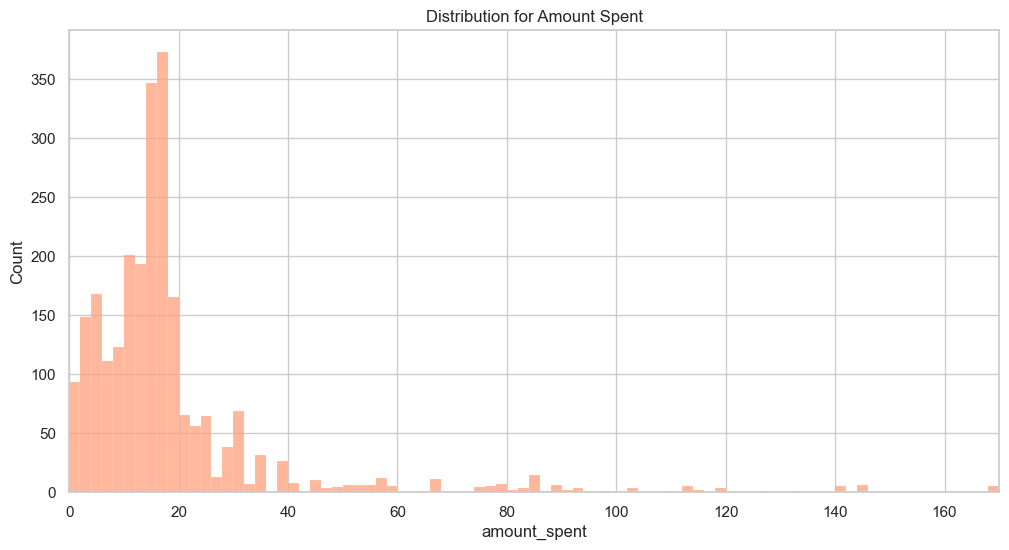

In [520]:
sns.histplot(x=orders_spain["amount_spent"], binwidth = 2, color = "#FFA07A")
plt.title("Distribution for Amount Spent")
plt.xlim(0, 170)
plt.show

#### Select all orders made in the month of August

In [521]:
august = orders[orders.month == 8]
august.head(10)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
199475,285421,561904,22075,2011,8,1,8,6 ribbons elegant christmas,96,2011-08-01 08:30:00,1.45,17941,United Kingdom,139.20
199476,285422,561904,85049E,2011,8,1,8,scandinavian reds ribbons,156,2011-08-01 08:30:00,1.06,17941,United Kingdom,165.36
199477,285423,561905,21385,2011,8,1,9,ivory hanging decoration heart,24,2011-08-01 09:31:00,0.85,14947,United Kingdom,20.40
199478,285424,561905,84970L,2011,8,1,9,single heart zinc t-light holder,12,2011-08-01 09:31:00,0.95,14947,United Kingdom,11.40
199479,285425,561905,84970S,2011,8,1,9,hanging heart zinc t-light holder,12,2011-08-01 09:31:00,0.85,14947,United Kingdom,10.20
199480,285426,561905,84978,2011,8,1,9,hanging heart jar t-light holder,12,2011-08-01 09:31:00,1.25,14947,United Kingdom,15.00
199481,285427,561905,21754,2011,8,1,9,home building block word,3,2011-08-01 09:31:00,5.95,14947,United Kingdom,17.85
199482,285428,561905,23226,2011,8,1,9,filigree heart daisy white,24,2011-08-01 09:31:00,1.25,14947,United Kingdom,30.00
199483,285429,561905,21715,2011,8,1,9,girls vintage tin seaside bucket,8,2011-08-01 09:31:00,2.55,14947,United Kingdom,20.40
199484,285430,561905,21716,2011,8,1,9,boys vintage tin seaside bucket,8,2011-08-01 09:31:00,2.55,14947,United Kingdom,20.40


#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [522]:
august_country = august.groupby("Country")

In [523]:
country_counts = august_country['Country'].value_counts()
country_counts

Country          Country        
Australia        Australia            107
Austria          Austria               88
Belgium          Belgium              194
Canada           Canada                 5
Channel Islands  Channel Islands      140
Denmark          Denmark               16
EIRE             EIRE                 593
Finland          Finland               61
France           France               569
Germany          Germany              795
Iceland          Iceland               22
Israel           Israel               171
Italy            Italy                 95
Malta            Malta                 55
Netherlands      Netherlands          280
Norway           Norway                77
Poland           Poland                17
Portugal         Portugal              41
Spain            Spain                252
Sweden           Sweden                40
Switzerland      Switzerland          267
United Kingdom   United Kingdom     23105
Unspecified      Unspecified           23
N

#### What's the  average amount of money spent by country

In [524]:
avg_per_country = orders.groupby(["Country"]).agg(
        mean_spent_per_country = ("amount_spent", "mean")
)

avg_per_country

,mean_spent_per_country
Country,
Australia,116.895620
Austria,25.624824
Bahrain,32.258824
Belgium,20.283772
Brazil,35.737500
Canada,24.280662
Channel Islands,27.340160
Cyprus,22.134169
Czech Republic,33.069600


#### What's the most expensive item?

In [525]:
orders["UnitPrice"].max()

8142.75

#### What was the average amount spent per year ?

In [526]:
avg_per_year = orders.groupby(["year"]).agg(
        mean_spent_per_year = ("amount_spent", "mean")
)

avg_per_year

,mean_spent_per_year
year,
2010,21.892733
2011,22.430074
